<a href="https://colab.research.google.com/github/akshatraj1199/Airline-Passenger-referral-prediction/blob/main/Airline_Passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - **Airline Passenger Referral Prediction**

---

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Akshat Raj Kumawat
##### **Team Member 2 -** Aishwarya K P
##### **Team Member 3 -** Soumyadip Paul


# **Project Summary -**


---



Write the summary here within 500-600 words.

# **GitHub LINK -**


---




*   List item
*   List item
*

# **PROBLEM DESCRIPTION :-**

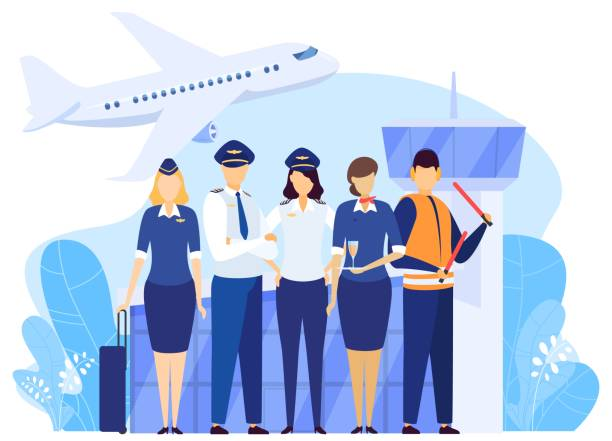

*An airline can be defined as a company that offers regular services for transporting passengers or goods via the air. These companies are said to make up the airline industry, which is also regarded as a sub-sector of the aviation sector and the wider travel industry. In this post, you will learn everything you need to know about airlines.*

# **Business Context -**


---
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.


# **Dataset Description :**



*   airline: Name of the airline.
*   overall: Overall point is given to the trip between 1 to 10.

*   author: Author of the trip

*   reviewdate: Date of the Review

*   customer review: Review of the customers in free text format

*   aircraft: Type of the aircraft
*   travellertype: Type of traveler (e.g. business, leisure)


*   cabin: Cabin at the flight


*   date flown: Flight date


*   seatcomfort: Rated between 1-5

*   cabin service: Rated between 1-5

*   foodbev: Rated between 1-5

*   entertainment: Rated between 1-5
*   groundservice: Rated between 1-5


*   valueformoney: Rated between 1-5

*   recommended: Binary, target variable





# **DATA PREPARATION:**

In [ ]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm

# importing required classes for model selection.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# importing model evaluation metrics.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# importing warnings library to avoid unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the Dataset:
file_path = '/content/drive/MyDrive/CAPSTONE PROJECT/ML Classification project/Dataset/data_airline_reviews.xlsx'
airline_df=pd.read_excel(file_path)

In [ ]:
# first five Rows of dataset
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Last five Rows of dataset
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
#Checking the column names:
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

Here **'recommended'** is the Dependent variable.

In [ ]:
# shape of the Dataset :
airline_df.shape

(131895, 17)

### Null values and duplicates


In [ ]:
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [ ]:
len(airline_df.duplicated())

131895

In [ ]:
def missing_values_check(df):
    percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
    missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


In [ ]:
#Creating a copy before the data preparation and analysis
airline_df_copy =airline_df.copy()


In [ ]:
recommended_nulvalues = airline_df[airline_df['recommended'].isnull()]

In [ ]:
recommended_nulvalues.isnull().sum()

airline            65948
overall            65968
author             65948
review_date        65948
customer_review    65948
aircraft           67454
traveller_type     67454
cabin              67454
route              67454
date_flown         67455
seat_comfort       67455
cabin_service      67455
food_bev           67455
entertainment      67455
ground_service     67455
value_for_money    67455
recommended        67455
dtype: int64

In [ ]:
missing_values_check(recommended_nulvalues)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


In [ ]:
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index , inplace = True)

In [ ]:
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.402545
ground_service,ground_service,38.923029
date_flown,date_flown,38.496276
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998


In [ ]:
airline_df.nunique()

airline               81
overall               10
author             43289
review_date         3010
customer_review    59750
aircraft            2088
traveller_type         4
cabin                  4
route              24548
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [ ]:
airline_df.drop(['author','aircraft','date_flown'] , axis = 1 , inplace = True)

In [ ]:
missing_values_check(airline_df)

,column_name,percent_missing
ground_service,ground_service,38.923029
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998
cabin,cabin,1.765984
value_for_money,value_for_money,0.721601


In [ ]:
#Dropping the null value rows
airline_df.dropna(axis=0,how='any',inplace = True)

In [ ]:
airline_df.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Checking the number of duplicates in the dataset
len(airline_df[airline_df.duplicated( keep='first')])

1744

In [ ]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [ ]:
#confirming that the duplicate rows are deleted
len(airline_df[airline_df.duplicated( keep='first')])

0

In [ ]:
missing_values_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
review_date,review_date,0.0
customer_review,customer_review,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
route,route,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0


In [ ]:
airline_df.shape

(22826, 14)

In [ ]:
#Comparing the size of changed dataset with original dataset and calculating its percentage
perc =(len(airline_df)/len(airline_df_copy))  * 100
perc

17.306190530346107

## EDA

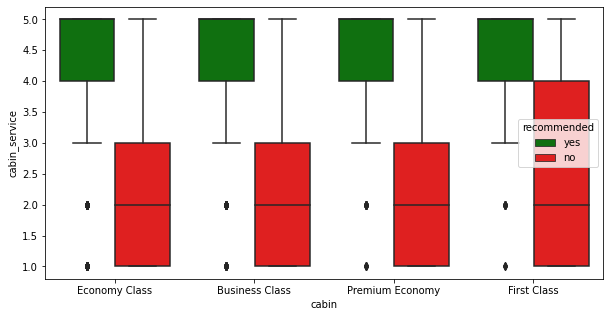

In [ ]:
#Cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.cabin_service, hue = airline_df['recommended'], palette= ['Green','red'])

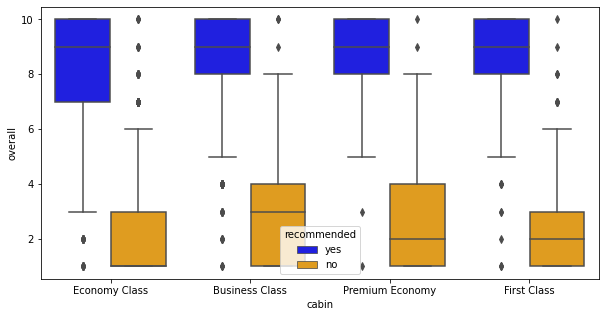

In [ ]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.overall, hue = airline_df['recommended'], palette= ['blue','orange'])

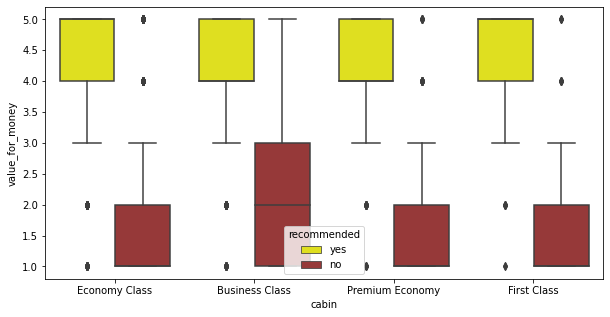

In [ ]:
#Cabin type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.value_for_money, hue = airline_df['recommended'], palette= ['yellow','brown'])